In [5]:
import rdkit.Chem
import pandas as pd
import sys
import os

### Demo

In [6]:
# Read in the table
path = os.path.join('Data', 'Glycan-Structures-CFG611.txt.gz')
smiles_table = pd.read_csv(path, sep='\t')

# Iterate over the molecules
for index, row in smiles_table.iterrows():
    # Convert SMILES string into RdKit molecule
    molecule = rdkit.Chem.MolFromSmiles(row['SMILES'])
    if not molecule:
        sys.stderr.write(f'SMILES not converted: {index}, {row["SMILES"]}\n')
        sys.exit(1)
    
    print(row['Name'])
    
    # Iterate over atoms
    for i, atom in enumerate(molecule.GetAtoms()):
        print(f'\t{i}\t{atom.GetSymbol()}\t{atom.GetTotalNumHs()}\t'
              f'{atom.GetHybridization()}\t{atom.GetChiralTag()}')
    
    # List bonds
    for bond in molecule.GetBonds():
        print(f'\t{bond.GetBondType()}\t{bond.GetBeginAtomIdx()}-{bond.GetEndAtomIdx()}')

CFG-007-Sp8
	0	O	1	SP3	CHI_UNSPECIFIED
	1	C	2	SP3	CHI_UNSPECIFIED
	2	C	1	SP3	CHI_TETRAHEDRAL_CW
	3	O	0	SP3	CHI_UNSPECIFIED
	4	C	1	SP3	CHI_TETRAHEDRAL_CCW
	5	O	1	SP3	CHI_UNSPECIFIED
	6	C	1	SP3	CHI_TETRAHEDRAL_CCW
	7	O	1	SP3	CHI_UNSPECIFIED
	8	C	1	SP3	CHI_TETRAHEDRAL_CW
	9	O	1	SP3	CHI_UNSPECIFIED
	10	C	1	SP3	CHI_TETRAHEDRAL_CW
	11	O	0	SP3	CHI_UNSPECIFIED
	12	C	2	SP3	CHI_UNSPECIFIED
	13	C	2	SP3	CHI_UNSPECIFIED
	14	C	2	SP3	CHI_UNSPECIFIED
	15	N	1	SP2	CHI_UNSPECIFIED
	16	C	0	SP2	CHI_UNSPECIFIED
	17	O	0	SP2	CHI_UNSPECIFIED
	18	C	2	SP3	CHI_UNSPECIFIED
	19	C	2	SP3	CHI_UNSPECIFIED
	20	C	2	SP3	CHI_UNSPECIFIED
	21	O	0	SP3	CHI_UNSPECIFIED
	22	C	3	SP3	CHI_UNSPECIFIED
	SINGLE	0-1
	SINGLE	1-2
	SINGLE	2-3
	SINGLE	2-4
	SINGLE	4-5
	SINGLE	4-6
	SINGLE	6-7
	SINGLE	6-8
	SINGLE	8-9
	SINGLE	8-10
	SINGLE	10-11
	SINGLE	11-12
	SINGLE	12-13
	SINGLE	13-14
	SINGLE	14-15
	SINGLE	15-16
	DOUBLE	16-17
	SINGLE	16-18
	SINGLE	18-19
	SINGLE	19-20
	SINGLE	20-21
	SINGLE	21-22
	SINGLE	10-3
CFG-008-Sp8
	0	O	1	SP3	CHI_UNSPECIF

## Load the data

In [12]:
path = os.path.join('Data', 'Fractions-Bound-Table.txt.gz')
Fractions_Bound_Table = pd.read_csv(path, sep='\t')
Fractions_Bound_Table.head()

ObjId  ProteinGroup  Concentration      GlycanID         f
0  1004699             1          0.001   CFG-007-Sp8  0.000000
1  1004699             1          0.001   CFG-008-Sp8  0.000154
2  1004699             1          0.001   CFG-009-Sp8  0.000082
3  1004699             1          0.001  CFG-010-Sp15  0.000290
4  1004699             1          0.001   CFG-010-Sp8  0.000000

In [13]:
Fractions_Bound_Table.describe()

ObjId   ProteinGroup  Concentration             f
count  3.346790e+05  334679.000000  334679.000000  3.346790e+05
mean   1.004931e+06      66.253589      37.540266  1.338208e-02
std    6.327957e+02      42.799381      67.169264  7.008441e-02
min    1.003786e+06       1.000000       0.001000  0.000000e+00
25%    1.004512e+06      29.000000       1.000000  0.000000e+00
50%    1.004714e+06      63.000000       5.000000  5.260004e-07
75%    1.005506e+06     102.000000      30.000000  2.794406e-04
max    1.006422e+06     147.000000     500.000000  9.246077e-01

In [8]:
path = os.path.join('Data', 'Glycan-Structures-CFG611.txt.gz')
Glycan_Structures_CFG611 = pd.read_csv(path, sep='\t')
Glycan_Structures_CFG611.head()

Name          IUPAC  \
0   CFG-007-Sp8      Gal(α-Sp8   
1   CFG-008-Sp8      Glc(α-Sp8   
2   CFG-009-Sp8      Man(α-Sp8   
3   CFG-010-Sp8   GalNAc(α-Sp8   
4  CFG-010-Sp15  GalNAc(α-Sp15   

                                              SMILES  
0  OC[C@@H](O1)[C@H](O)[C@H](O)[C@@H](O)[C@H]1-OC...  
1  OC[C@@H](O1)[C@@H](O)[C@H](O)[C@@H](O)[C@H]1-O...  
2  OC[C@@H](O1)[C@@H](O)[C@H](O)[C@H](O)[C@H]1-OC...  
3  OC[C@@H](O1)[C@H](O)[C@H](O)[C@@H](NC(=O)C)[C@...  
4  OC[C@@H](O1)[C@H](O)[C@H](O)[C@@H](NC(=O)C)[C@...

In [9]:
path = os.path.join('Data', 'Protein-Sequence-Table.txt.gz')
Protein_Sequence_Table = pd.read_csv(path, sep='\t')
Protein_Sequence_Table.head()

ProteinGroup Accession       Uniprot                         Description  \
0             1    Q41358   SNAIB_SAMNI  Ribosome-inactivating protein SNAI   
1             2    P22972    LEC1_ULEEU                  Anti-H(O) lectin 1   
2             4    A8WDZ4  A8WDZ4_CANEN                      Concanavalin A   
3             6    P09382    LEG1_HUMAN                          Galectin-1   
4             7    P16045    LEG1_MOUSE                          Galectin-1   

                                 Amino Acid Sequence  
0  MRLVAKLLYLAVLAICGLGIHGALTHPRVTPPVYPSVSFNLTGADT...  
1  SDDLSFKFKNFSQNGKDLSFQGDASVIETGVLQLNKVGNNLPDETG...  
2  MAISKKSSLFLPIFTFITMFLMVVNKVSSSTHETNALHFMFNQFSK...  
3  MACGLVASNLNLKPGECLRVRGEVAPDAKSFVLNLGKDSNNLCLHF...  
4  MACGLVASNLNLKPGECLKVRGEVASDAKSFVLNLGKDSNNLCLHF...


=== Fractions Bound Table Analysis ===
Shape: (334679, 5)

Columns: ['ObjId', 'ProteinGroup', 'Concentration', 'GlycanID', 'f']

Data Types:
ObjId              int64
ProteinGroup       int64
Concentration    float64
GlycanID          object
f                float64
dtype: object

Missing Values:
ObjId            0
ProteinGroup     0
Concentration    0
GlycanID         0
f                0
dtype: int64

Sample Data:
     ObjId  ProteinGroup  Concentration      GlycanID         f
0  1004699             1          0.001   CFG-007-Sp8  0.000000
1  1004699             1          0.001   CFG-008-Sp8  0.000154
2  1004699             1          0.001   CFG-009-Sp8  0.000082
3  1004699             1          0.001  CFG-010-Sp15  0.000290
4  1004699             1          0.001   CFG-010-Sp8  0.000000

Summary Statistics:
              ObjId   ProteinGroup  Concentration             f
count  3.346790e+05  334679.000000  334679.000000  3.346790e+05
mean   1.004931e+06      66.253589      37.5402

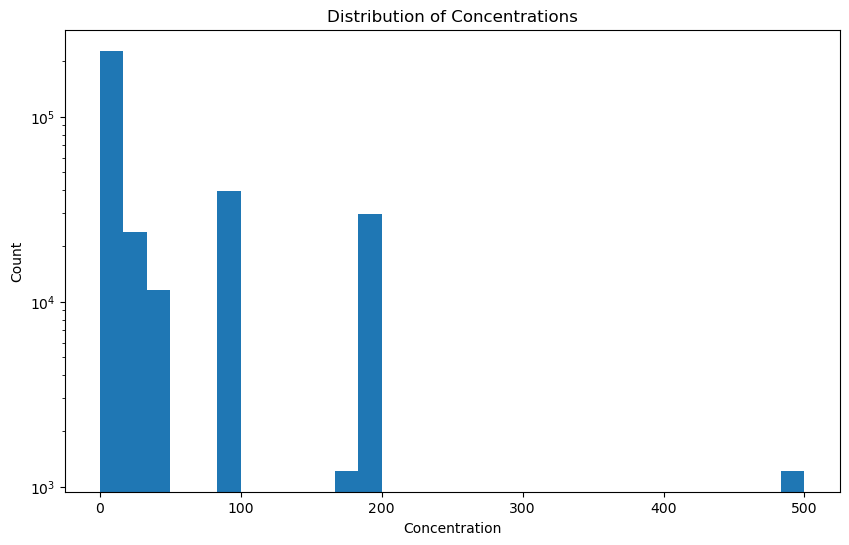


Binding Fraction ('f') Statistics:
count    3.346790e+05
mean     1.338208e-02
std      7.008441e-02
min      0.000000e+00
25%      0.000000e+00
50%      5.260004e-07
75%      2.794406e-04
max      9.246077e-01
Name: f, dtype: float64

Protein Group Statistics:
             Concentration                          f          
                      mean        std count      mean       std
ProteinGroup                                                   
1                13.011778  30.919820  5499  0.019469  0.094765
2                 6.345714   8.671191  4277  0.018016  0.088930
3                23.087143  35.601407  4277  0.009281  0.063674
4                26.933333  37.083429  3666  0.032369  0.124681
5                 9.435000  18.224015  3666  0.004792  0.031012
...                    ...        ...   ...       ...       ...
143              74.000000  89.422422  1830  0.005695  0.026575
144              74.000000  89.422422  1830  0.011062  0.038055
145              86.666667  81.80

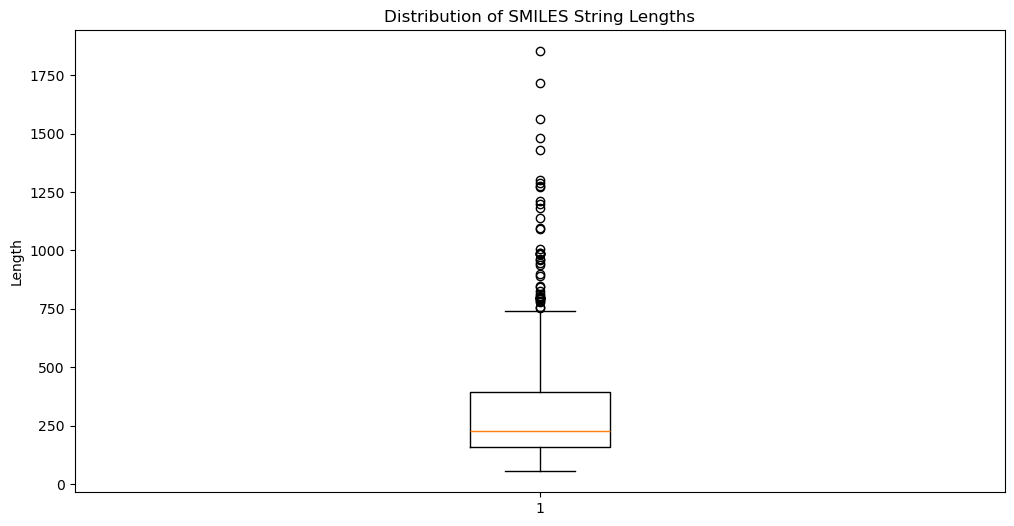

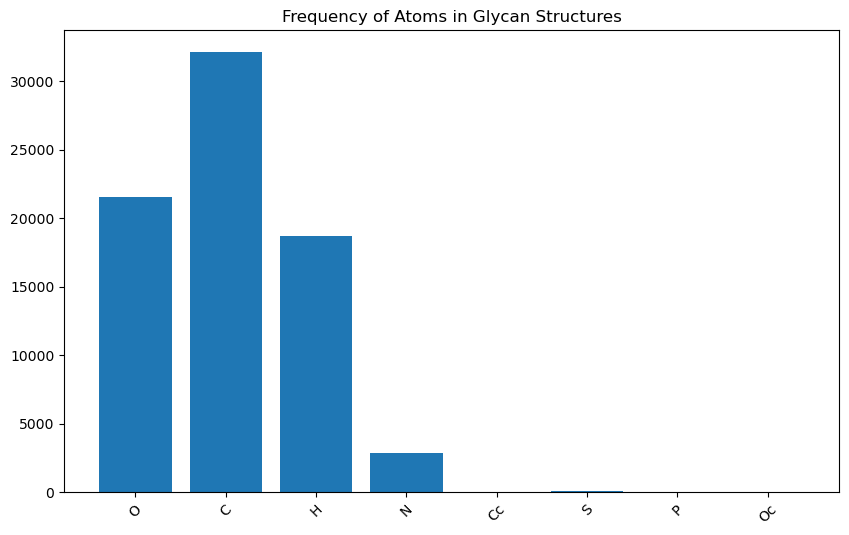


=== Protein Sequence Analysis ===


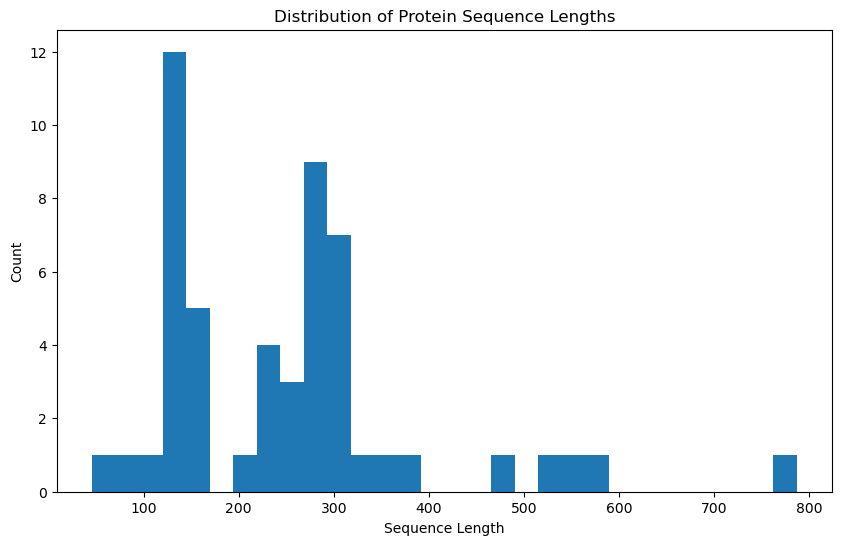

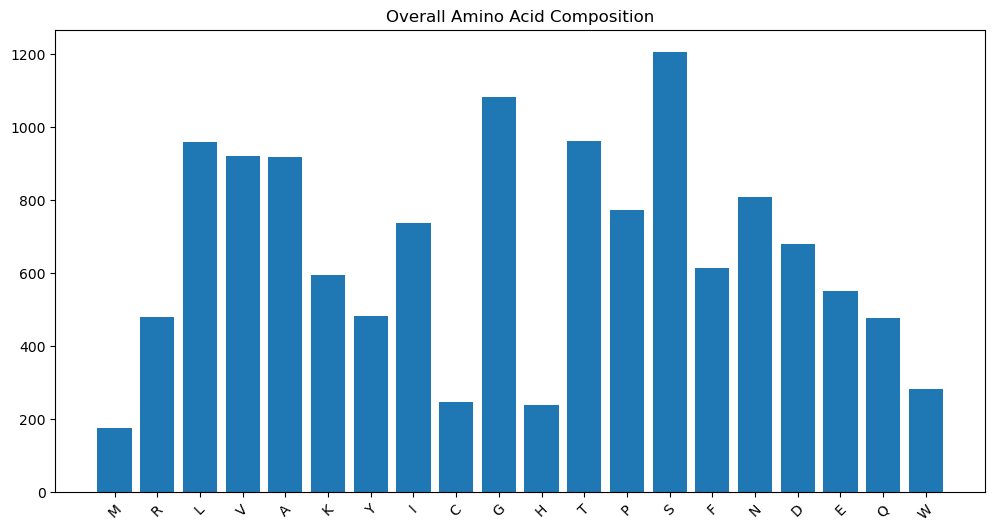


=== Cross-table Relationship Analysis ===

Top binding glycans:
                     f                
                  mean       std count
Name                                  
CFG-610-Sp19  0.070523  0.174506   548
CFG-617-Sp24  0.068214  0.170060   548
CFG-608-Sp24  0.065473  0.165123   548
CFG-609-Sp19  0.065317  0.169799   548
CFG-606-Sp24  0.064852  0.161033   548


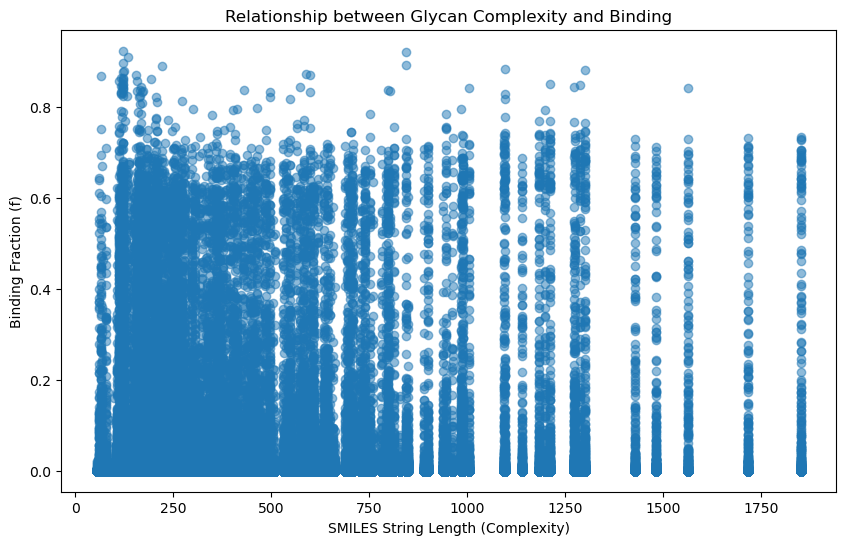

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import re

# Read the tables with error handling
def load_data():
    try:
        fractions_table = Fractions_Bound_Table
        glycan_structures = Glycan_Structures_CFG611
        protein_sequences = Protein_Sequence_Table
        return fractions_table, glycan_structures, protein_sequences
    except Exception as e:
        print(f"Error loading data: {e}")
        return None, None, None

# 1. Basic Data Overview
def print_basic_stats(df, table_name):
    if df is not None:
        print(f"\n=== {table_name} Analysis ===")
        print(f"Shape: {df.shape}")
        print("\nColumns:", df.columns.tolist())
        print("\nData Types:")
        print(df.dtypes)
        print("\nMissing Values:")
        print(df.isnull().sum())
        print("\nSample Data:")
        print(df.head())
        print("\nSummary Statistics:")
        print(df.describe())

# 2. Analyze Fractions Table
def analyze_fractions(fractions_table):
    if fractions_table is None:
        return
    
    print("\n=== Detailed Fractions Analysis ===")
    
    # Distribution of concentrations
    plt.figure(figsize=(10, 6))
    plt.hist(fractions_table['Concentration'], bins=30)
    plt.title('Distribution of Concentrations')
    plt.xlabel('Concentration')
    plt.ylabel('Count')
    plt.yscale('log')
    plt.show()
    
    # Summary statistics for 'f' values
    print("\nBinding Fraction ('f') Statistics:")
    print(fractions_table['f'].describe())
    
    # Group by ProteinGroup
    group_stats = fractions_table.groupby('ProteinGroup').agg({
        'Concentration': ['mean', 'std', 'count'],
        'f': ['mean', 'std']
    })
    print("\nProtein Group Statistics:")
    print(group_stats)

# 3. Analyze Glycan Structures
def analyze_glycans(glycan_structures):
    if glycan_structures is None:
        return
        
    print("\n=== Glycan Structure Analysis ===")
    
    # Analyze SMILES complexity
    glycan_structures['SMILES_length'] = glycan_structures['SMILES'].str.len()
    
    plt.figure(figsize=(12, 6))
    plt.boxplot(glycan_structures['SMILES_length'])
    plt.title('Distribution of SMILES String Lengths')
    plt.ylabel('Length')
    plt.show()
    
    # Pattern analysis in SMILES
    def extract_atoms(smiles):
        return re.findall(r'[A-Z][a-z]?', smiles)
    
    all_atoms = []
    for smiles in glycan_structures['SMILES']:
        all_atoms.extend(extract_atoms(smiles))
    
    atom_counts = Counter(all_atoms)
    
    plt.figure(figsize=(10, 6))
    plt.bar(list(atom_counts.keys()), list(atom_counts.values()))
    plt.title('Frequency of Atoms in Glycan Structures')
    plt.xticks(rotation=45)
    plt.show()

# 4. Analyze Protein Sequences
def analyze_proteins(protein_sequences):
    if protein_sequences is None:
        return
        
    print("\n=== Protein Sequence Analysis ===")
    
    # Sequence length distribution
    protein_sequences['seq_length'] = protein_sequences['Amino Acid Sequence'].str.len()
    
    plt.figure(figsize=(10, 6))
    plt.hist(protein_sequences['seq_length'], bins=30)
    plt.title('Distribution of Protein Sequence Lengths')
    plt.xlabel('Sequence Length')
    plt.ylabel('Count')
    plt.show()
    
    # Amino acid composition analysis
    def get_aa_composition(sequence):
        return Counter(sequence)
    
    aa_compositions = protein_sequences['Amino Acid Sequence'].apply(get_aa_composition)
    total_aa_count = Counter()
    for comp in aa_compositions:
        total_aa_count.update(comp)
    
    plt.figure(figsize=(12, 6))
    plt.bar(list(total_aa_count.keys()), list(total_aa_count.values()))
    plt.title('Overall Amino Acid Composition')
    plt.xticks(rotation=45)
    plt.show()

# 5. Cross-table Analysis
def analyze_relationships(fractions_table, glycan_structures):
    if fractions_table is None or glycan_structures is None:
        return
        
    print("\n=== Cross-table Relationship Analysis ===")
    
    # Merge fractions with glycan structures
    merged_data = pd.merge(
        fractions_table,
        glycan_structures,
        left_on='GlycanID',
        right_on='Name',
        how='left'
    )
    
    # Analyze binding patterns
    binding_by_glycan = merged_data.groupby('Name').agg({
        'f': ['mean', 'std', 'count']
    }).sort_values(('f', 'mean'), ascending=False)
    
    print("\nTop binding glycans:")
    print(binding_by_glycan.head())
    
    # Visualize relationship between SMILES complexity and binding
    merged_data['SMILES_length'] = merged_data['SMILES'].str.len()
    
    plt.figure(figsize=(10, 6))
    plt.scatter(merged_data['SMILES_length'], merged_data['f'], alpha=0.5)
    plt.xlabel('SMILES String Length (Complexity)')
    plt.ylabel('Binding Fraction (f)')
    plt.title('Relationship between Glycan Complexity and Binding')
    plt.show()

def main():
    # Load data
    fractions_table, glycan_structures, protein_sequences = load_data()
    
    # Run basic statistics
    print_basic_stats(fractions_table, "Fractions Bound Table")
    print_basic_stats(glycan_structures, "Glycan Structures")
    print_basic_stats(protein_sequences, "Protein Sequences")
    
    # Run detailed analyses
    analyze_fractions(fractions_table)
    analyze_glycans(glycan_structures)
    analyze_proteins(protein_sequences)
    analyze_relationships(fractions_table, glycan_structures)

if __name__ == "__main__":
    main()